# Project : Mall Customer Segmentation

In this project, we will analyze the Mall Customer dataset to gain a deeper understanding of the target customers. This analysis will provide valuable insights for the marketing team, helping them develop a more informed strategy. We will perform customer segmentation using the unsupervised machine learning technique, KMeans Clustering Algorithm, and apply Principal Component Analysis (PCA) to visualize the dataset.

Source : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

About the dataset:
- CustomerID: Unique identifier for each customer.
- Gender: Customer's gender (Male/Female).
- Age: Customer's age.
- Annual Income (k$): Customer's annual income (thousands of dollars).   
- Spending Score (1-100): Score based on the ustomer behavior and purchasing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv("D:\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.drop(columns='CustomerID').duplicated().any()

False

In [ ]:
data.drop(columns='CustomerID', inplace=True)

In [7]:
cat_cols=data.select_dtypes('object').columns
cat_cols

Index(['Gender'], dtype='object')

In [8]:
for col in cat_cols:
    print(col, ': ', data[col].unique())

Gender :  ['Male' 'Female']


In [9]:
num_cols=data.select_dtypes('number').columns
num_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
data[num_cols].nunique()

Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [11]:
data=pd.get_dummies(data, columns=['Gender'], drop_first=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


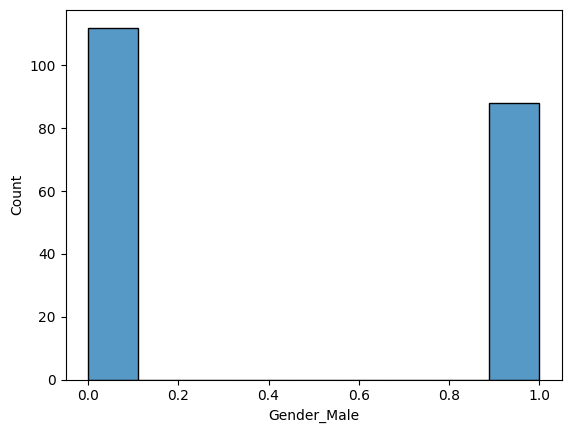

In [12]:
sns.histplot(data.Gender_Male)
plt.show()

The two classes, Male and Female, do not differ significantly

Age skew:  0.48556885096681657


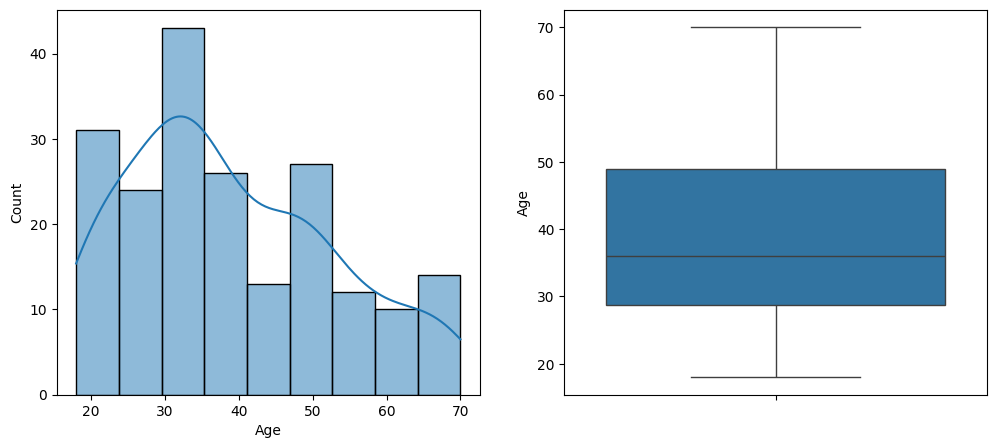

Annual Income (k$) skew:  0.3218425498619055


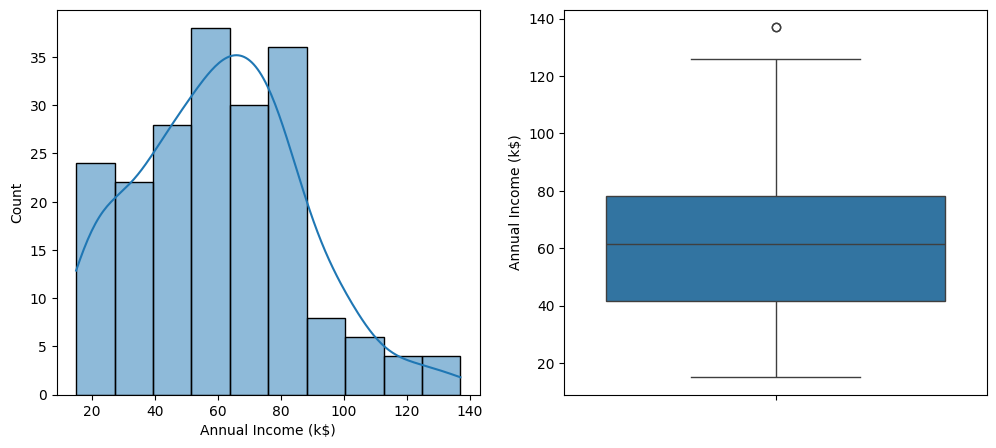

Spending Score (1-100) skew:  -0.047220201374263374


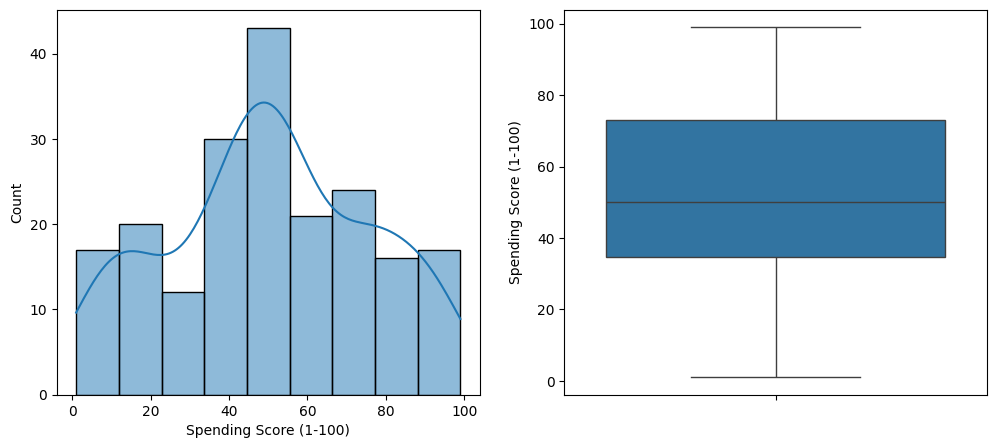

In [13]:
for col in num_cols:
    print(col,'skew: ',data[col].skew())
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax1=sns.histplot(data=data, x=col, kde=True)
    plt.subplot(1,2,2)
    ax2=sns.boxplot(data=data, y=col)
    plt.show()

- The Income variable has one outlier, but since the number of outliers is small, it can be ignored.
- The data shows a slight right skew: Income, Age.
- The data approximates a normal distribution: Spending Score.

### Use KMeans to cluster customers, determine the optimal number of clusters using the Elbow method

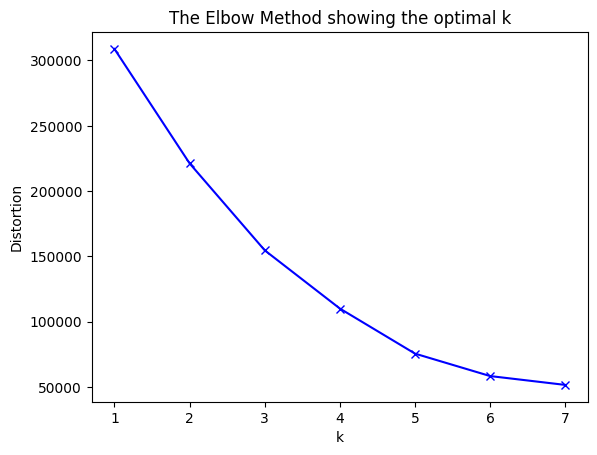

In [14]:
wcss=[]
K=range(1,8)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(data)
    wcss.append(kmeanModel.inertia_)    

# Plot the elbow
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Choose k=5 because from 5 onwards, the error decreases significantly less

In [15]:
kmeanModel=KMeans(n_clusters=5)
kmeanModel.fit(data)
centroids=kmeanModel.cluster_centers_
labels=kmeanModel.labels_
print(centroids)
print(labels)

[[25.52173913 26.30434783 78.56521739  0.39130435]
 [40.32432432 87.43243243 18.18918919  0.51351351]
 [45.2173913  26.30434783 20.91304348  0.39130435]
 [43.28205128 55.02564103 49.69230769  0.42307692]
 [32.69230769 86.53846154 82.12820513  0.46153846]]
[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 1 4 3 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [16]:
data['Group']=pd.Series(labels)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Group
0,19,15,39,1,2
1,21,15,81,1,0
2,20,16,6,0,2
3,23,16,77,0,0
4,31,17,40,0,2


In [17]:
for cluster in data['Group'].unique():
    print("Cluster: " + str(cluster))
    for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']:
        print(col + ": {:.2f}".format(data.loc[data['Group'] == cluster, col].mean()))
    print('*'*20)

Cluster: 2
Age: 45.22
Annual Income (k$): 26.30
Spending Score (1-100): 20.91
Gender_Male: 0.39
********************
Cluster: 0
Age: 25.52
Annual Income (k$): 26.30
Spending Score (1-100): 78.57
Gender_Male: 0.39
********************
Cluster: 3
Age: 43.28
Annual Income (k$): 55.03
Spending Score (1-100): 49.69
Gender_Male: 0.42
********************
Cluster: 4
Age: 32.69
Annual Income (k$): 86.54
Spending Score (1-100): 82.13
Gender_Male: 0.46
********************
Cluster: 1
Age: 40.32
Annual Income (k$): 87.43
Spending Score (1-100): 18.19
Gender_Male: 0.51
********************


The data is divided into 4 clusters with features below:

- Group 0 : Average age around 25, income of $26k, spending score of 79, female
- Group 1 : Average age around 40, income of $87k, spending score of 18, male
- Group 2 : Average age around 45, income of $26k, spending score of 21, female
- Group 3 : Average age around 43, income of $55k, spending score of 50, female
- Group 4 : Average age around 33, income of $67k, spending score of 82, female

### Perform PCA for dimensionality reduction and visualization

In [18]:
pca=PCA(n_components=2)

In [19]:
principal_component=pca.fit_transform(data.iloc[:,:4])
pca.explained_variance_ratio_

array([0.45118077, 0.44091539])

In [20]:
pca.explained_variance_ratio_.sum()

0.892096162464606

In [30]:
principal_df=pd.DataFrame(data=principal_component, columns=['principal component 1', 'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


In [31]:
kmeanModel=KMeans(n_clusters=5)
kmeanModel.fit(principal_df)
centroids=kmeanModel.cluster_centers_
labels=kmeanModel.labels_

In [34]:
print(centroids)

[[ -4.41026389  -3.10070422]
 [  4.98536192 -46.67336912]
 [-10.22445521  42.33140596]
 [ 41.55103875   1.87087541]
 [-44.38675468 -10.05043814]]


In [32]:
principal_df['Group']=pd.Series(labels)
principal_df.head()

,principal component 1,principal component 2,Group
0,-31.869945,-33.001252,4
1,0.764494,-56.842901,1
2,-57.408276,-13.124961,4
3,-2.168543,-53.478590,1
4,-32.174085,-30.388412,4


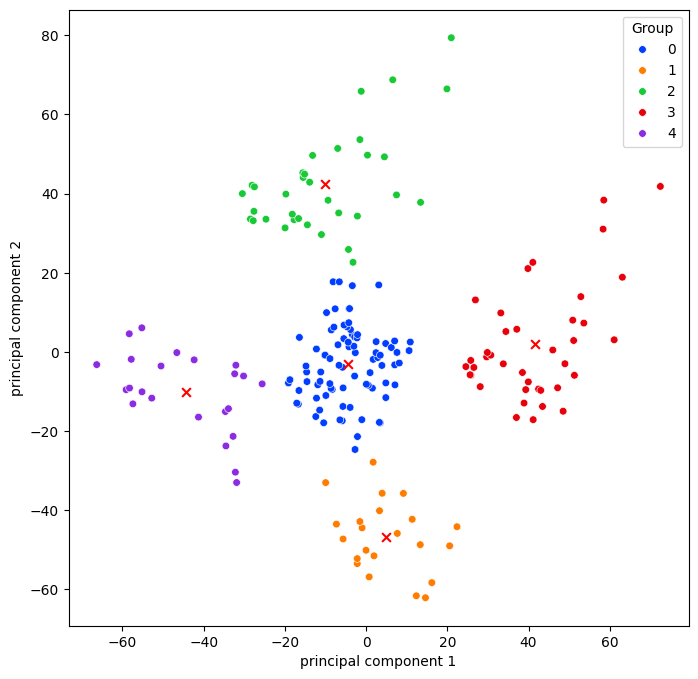

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=principal_df, x='principal component 1', y='principal component 2', hue='Group', s=30, palette='bright')
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=40, color='red')
plt.show()

The data is divided into 5 clusters, which are clearly separated, and the centroids are located at the center of the clusters, representing the data points within the clusters well.

In [42]:
vector_one=pd.Series(pca.components_[0], index=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'])
vector_one

Age                      -0.188977
Annual Income (k$)        0.588623
Spending Score (1-100)    0.786009
Gender_Male              -0.000333
dtype: float64

In the first principal component, Annual Income and Spending Score have the most significant impact. Customers with higher income and higher spending scores will have higher values on this component, while Age and Gender have less influence.

In [43]:
vector_two=pd.Series(pca.components_[1], index=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'])
vector_two

Age                       0.130961
Annual Income (k$)        0.808388
Spending Score (1-100)   -0.573895
Gender_Male               0.001579
dtype: float64

In the second principal component, Annual Income has the most significant impact and is negatively correlated with Spending Score. Customers with high income but low spending scores will have higher values on this component, while Age and Gender have less influence.